# IMDB Top 250 Films

## Examining trends of the Top-Rated Films

This project is drawing data primarily from the IMDB Top 250 Films Dataset, taken from Kaggle. Revenue and Budget data have been imported from the MovieLens Movies Dataset. Budget data has been adjusted for inflation in an attempt to show a clearer reflection of changes over time. 

Basic data cleaning has been done to remove unneeded columns and remove obvious errors of movies whose budget exceeds the highest recorded budget of all time or duplicate entries in the Movies Dataset. That being said, the financial data provided by the dataset was not audited line-by-line and is taken as true for the sake of this analysis.

The goal of this analysis is to identify trends in genre, duration, budget and revenue over time and to answer the following questions:

- Is there a certain genre of film that is more popular within this dataset?
- What is the distribution of ratings?
- How have film runtimes changed over time?
- How has film revenue changed? Is it increasing/decreasing?
- Are film budgets growing or shrinking and what impact does that have on revenue and profit?
- What is the budget to revenue comparison for the Top 10 Films from the dataset?
- Do newer or older films garner more votes on the IMDB?

Overall, we can see that more money is being spent to make movies as time passes, they generate more revenue and more profit as a result. 

Average movie runtimes increased in the 1920s and 1930s and fell sharply in the 1940s, to their lowest point. They rose again to their highest point in the 1960s and have stabilized to around 120 minutes since the 1980s. Further investigation could give some insight into what drove these trends. We can see that budget follows a similar path in the 1940s-1960s, so films may have been shorter due to budgetary constraints or possibly because of World War 2. The increase of runtime in the 1960s could be due to greater access to color film and the growth of Hollywood studios. 

Comparing the budets and revenues of the Top 10 of the Top 250 Films show that the highest ratings can come with a varied combination of budget and revenue. The Top 10 includes movies that were both expensive and inexpensive (comparatively) to make and also varied in their financial success.

As far as the accumulation of votes, we see that newer films are getting more votes, which could be do to increased access to films or technology. Again, more specific information regarding ratings would be needed to draw thourough conclusions. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cpi
from scipy import stats
import scipy.stats as st
from colour import Color
from scipy.stats import linregress
import seaborn

In [20]:
# Import Datasets

# https://www.kaggle.com/datasets/yehorkorzh/imdb-top-250-movies
# Import of IMDB top 250 Movies dataset
movie_metadata_path = "../Resources/imdb_top250_movies.csv"
movie_data_complete = pd.read_csv(movie_metadata_path)


# https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv
#Import of The Movies dataset (revenue and budget data)
movie_bulk_data = "../Resources/movies_metadata.csv"
movie_metadata = pd.read_csv(movie_bulk_data, low_memory=False)



In [3]:
# Clean IMDB data to remove unneeded rows
movie_data_clean= movie_data_complete.drop(columns=['Unnamed: 0','imdbID','Metascore','Plot','Actors','DVD','Type','Website','Awards','Writer','Country','Language'])
movie_data_clean['Runtime'] = movie_data_clean['Runtime'].str.replace('min', '')
movie_data_clean['Runtime'] = movie_data_clean['Runtime'].astype(int)
#reformat imdb votes column so it can be sorted/formatted
movie_data_clean['imdbVotes'] = movie_data_clean['imdbVotes'].str.replace(',','')
movie_data_clean['imdbVotes'] = movie_data_clean['imdbVotes'].astype(int)
# Copy IMDB Cleaned dataset to merge with revenue/budget data
movie_data_copy = movie_data_clean.copy()

# Reset index so that index # is the same as rating number.
movie_data_clean = movie_data_clean.set_index('Num')
movie_data_clean.head()


,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,BoxOffice,Production
Num,,,,,,,,,,
1,The Shawshank Redemption,1994,14-Oct-94,142,"Crime, Drama",Frank Darabont,9.3,1825626,NaN,Columbia Pictures
2,The Godfather,1972,24-Mar-72,175,"Crime, Drama",Francis Ford Coppola,9.2,1243444,NaN,Paramount Pictures
3,The Godfather: Part II,1974,20-Dec-74,202,"Crime, Drama",Francis Ford Coppola,9.0,856870,NaN,Paramount Pictures
4,The Dark Knight,2008,18-Jul-08,152,"Action, Crime, Drama",Christopher Nolan,9.0,1802351,"$533,316,061",Warner Bros. Pictures/Legendary
5,12 Angry Men,1957,1-Apr-57,96,"Crime, Drama",Sidney Lumet,8.9,494215,NaN,Criterion Collection


In [4]:
# Clean Revenue/Budget data for merging
metadata_clean = movie_metadata[["original_title", "revenue", "budget"]]
metadata_clean = metadata_clean.rename(columns={"original_title":"Title", "revenue":"BoxOffice"})
metadata_merge = pd.merge(movie_data_copy, metadata_clean, on="Title")
metadata_merge['budget'] = metadata_merge.loc[:, 'budget'].astype(int)

# Filter out zero value rows from merged dataset
metadata_merge['BoxOffice_y'] = metadata_merge.loc[:, 'BoxOffice_y'].astype(int)
metadata_merge = metadata_merge[metadata_merge["BoxOffice_y"] > 1000]
metadata_merge = metadata_merge[metadata_merge["budget"] > 1000]

# Clean up merged dataset for analysis
# metadata_merge['BoxOffice_y'] = metadata_merge.loc[:, 'BoxOffice_y'].astype(int)
metadata_merge = metadata_merge.rename(columns={"BoxOffice_y":"Revenue","budget":"Budget"})
metadata_merge = metadata_merge.drop(columns=["BoxOffice_x"])
# Correct sort back to index value
metadata_merge.sort_index()
# Reset index to rating number
movie_data_with_revenue = metadata_merge.set_index('Num')
# Remove duplicated rows in metadata datasheet
movie_data_with_revenue = movie_data_with_revenue.drop_duplicates(subset=['Title'], keep= 'last')
movie_data_with_revenue.head()


,Title,Year,Released,Runtime,Genre,Director,imdbRating,imdbVotes,Production,Revenue,Budget
Num,,,,,,,,,,,
1,The Shawshank Redemption,1994,14-Oct-94,142,"Crime, Drama",Frank Darabont,9.3,1825626,Columbia Pictures,28341469,25000000
2,The Godfather,1972,24-Mar-72,175,"Crime, Drama",Francis Ford Coppola,9.2,1243444,Paramount Pictures,245066411,6000000
3,The Godfather: Part II,1974,20-Dec-74,202,"Crime, Drama",Francis Ford Coppola,9.0,856870,Paramount Pictures,47542841,13000000
4,The Dark Knight,2008,18-Jul-08,152,"Action, Crime, Drama",Christopher Nolan,9.0,1802351,Warner Bros. Pictures/Legendary,1004558444,185000000
5,12 Angry Men,1957,1-Apr-57,96,"Crime, Drama",Sidney Lumet,8.9,494215,Criterion Collection,1000000,350000


In [5]:
# inflation adjustment for Budget
movie_data_with_revenue["Budget"] = movie_data_with_revenue.apply(lambda x: cpi.inflate(x["Budget"], x["Year"]), axis=1)
movie_data_with_revenue["Budget"] = movie_data_with_revenue.loc[:, "Budget"].astype(int)

# Eliminate unused columns
movie_data_with_revenue = movie_data_with_revenue[["Title", "Year", "imdbRating", "imdbVotes", "Budget", "Revenue", ]]
movie_data_with_revenue = movie_data_with_revenue.rename(columns={"imdbRating":"IMDB Rating", "imdbVotes":"IMDB Votes"})
# Filter out obvious outliers
# https://en.wikipedia.org/wiki/List_of_most_expensive_films
movie_data_with_revenue = movie_data_with_revenue[movie_data_with_revenue["Budget"] <= 500000000]

# FINAL merged sort
movie_data_with_revenue.head()

# Export the merged dataset into a csv
movie_data_with_revenue.to_csv("../output_data/merged_dataset.csv", index_label="Title")

# Dataset Averages:

In [6]:
rating = movie_data_with_revenue["IMDB Rating"].mean()
votes = movie_data_with_revenue["IMDB Votes"].mean()
budget = movie_data_with_revenue["Budget"].mean()
budget = budget / 1000000
revenue = movie_data_with_revenue["Revenue"].mean()
revenue = revenue / 1000000

print(f'The average Rating is {rating.round(2)} (out of 10).')
print(f'The average Number of Votes is {votes.round(2)}.')
print(f'The average Budget is ${budget.round(2)} Million.')
print(f'The average Revenue is ${revenue.round(2)} Million.')

The average Rating is 8.25 (out of 10).
The average Number of Votes is 478151.68.
The average Budget is $67.61 Million.
The average Revenue is $232.95 Million.


In [7]:
# Define Linear Regression function for plots

def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

## Revenue vs. Vote Count

There is a positive correlation between revenue and vote count. 

The r-value is 0.46573760408501086


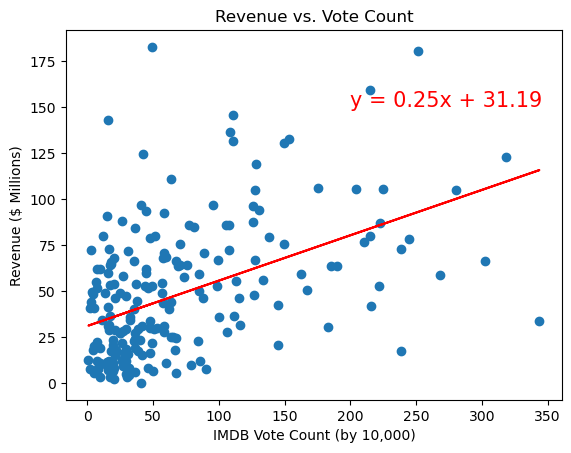

In [8]:
#Revenue vs. Vote Count
x_values = movie_data_with_revenue["Budget"].div(1000000).round(2)
y_values = movie_data_with_revenue["IMDB Votes"].div(10000).round(2)
x_annotate = 200
y_annotate = 150

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)


# # Incorporate the other graph properties
plt.title("Revenue vs. Vote Count")
plt.xlabel("IMDB Vote Count (by 10,000)")
plt.ylabel("Revenue ($ Millions)")

# # Save the figure
plt.savefig("../output_data/votes_revenue.png")

# Show plot
plt.show()

# Budget vs. Vote Count

There is a positive correlation between budget and vote count.

The r-value is 0.46573760408501086


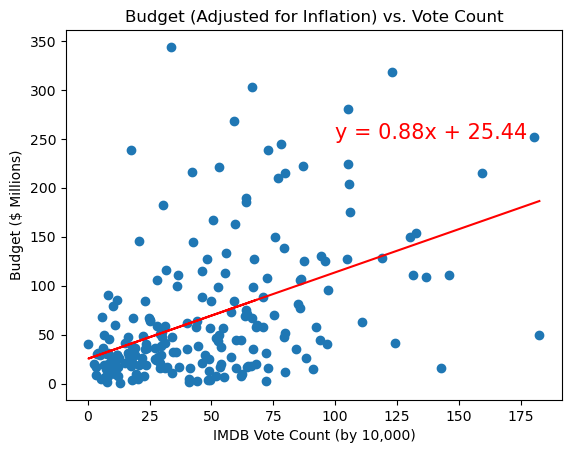

In [9]:
# Budget vs IMDB votes
x_values = movie_data_with_revenue["IMDB Votes"].div(10000).round(2)
y_values = movie_data_with_revenue["Budget"].div(1000000).round(2)
x_annotate = 100
y_annotate = 250

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)


# # Incorporate the other graph properties
plt.title("Budget (Adjusted for Inflation) vs. Vote Count")
plt.xlabel("IMDB Vote Count (by 10,000)")
plt.ylabel("Budget ($ Millions)")

# # Save the figure
plt.savefig("../output_data/Budget_Votes.png")

# Show plot
plt.show()

# Year vs. Budget

There is a positive correlation between release year and budget. Movies are getting more expensive with time.

The r-value is 0.4301396547419836


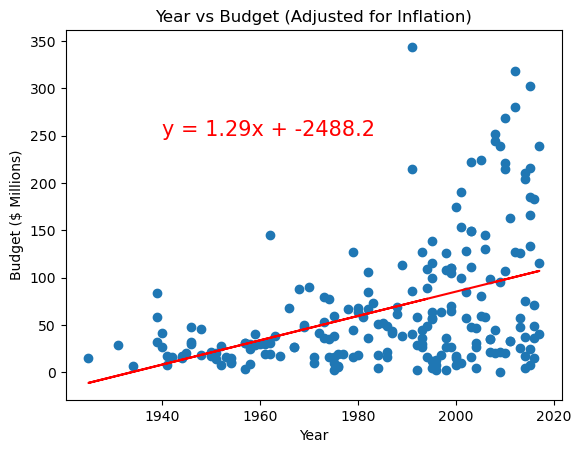

In [10]:
# Release year vs budget (adjusted)
x_values = movie_data_with_revenue["Year"]
y_values = movie_data_with_revenue["Budget"].div(1000000).round(2)
x_annotate = 1940
y_annotate = 250

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)


# # Incorporate the other graph properties
plt.title("Year vs Budget (Adjusted for Inflation)")
plt.xlabel("Year")
plt.ylabel("Budget ($ Millions)")

# # Save the figure
plt.savefig("../output_data/Year_budget.png")

# Show plot
plt.show() 

# Release Year vs. Revenue

Revenue is increasing over time along with film cost.

The r-value is 0.48988075542105874


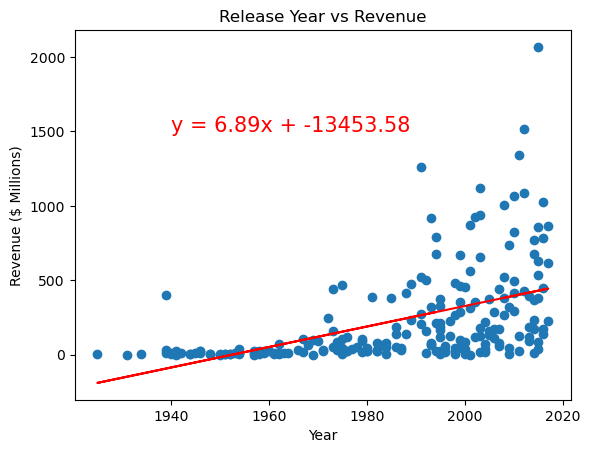

In [11]:
# Release year vs revenue (adjusted)
x_values = movie_data_with_revenue["Year"]
y_values = movie_data_with_revenue["Revenue"].div(1000000).round(2)

x_annotate = 1940
y_annotate = 1500

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)

# # Incorporate the other graph properties
plt.title("Release Year vs Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue ($ Millions)")
plt.ticklabel_format(style='plain')
# plt.style.use('bmh')

# # Save the figure
plt.savefig("../output_data/Year_Revenue.png")

# Show plot
plt.show()

# Release Date vs. IMDB Vote Count:
   Generally, the vote count increases with more recent films. 
   

This could be possibly attributed to availability of technology and the history of IMDB. 

IMDB was started in 1990, so any films released prior to 1990 had to be rated retroactively, whereas films released after 1990, could begin to be rated upon their release, which could possible garner more reviews. With time, internet access and access to films has only continued to increase, with more cable channels, DVDs, torrenting and streaming. Overall, newer releases are receiving more votes than legacy releases. 

The r-value is 0.5125034911282846


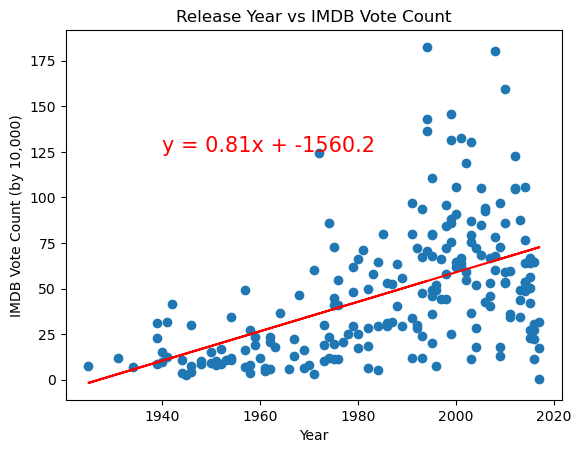

In [12]:
# Year vs IMDB votes
x_values = movie_data_with_revenue["Year"]
y_values = movie_data_with_revenue["IMDB Votes"].div(10000).round(2)

x_annotate = 1940
y_annotate = 125

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)


# # Incorporate the other graph properties
plt.title("Release Year vs IMDB Vote Count")
plt.xlabel("Year")
plt.ylabel("IMDB Vote Count (by 10,000)")

# # Save the figure
plt.savefig("../output_data/Year_Votes.png")

# Show plot
plt.show()

# Average Budget by Decade

## Movies are getting more expensive

Historical budget numbers were adjusted for inflation using the CPI library but evenso, movies are getting more expensive with time. This could be attributed to a variety of factors, including digital effects and other new technologies as well as changes in the industry as films become more international and rental/streaming options give opportunities to earn additional revenue post-box office release.

Further information regarding specifics of film budgets over time could give greater insight into what is driving these trends.

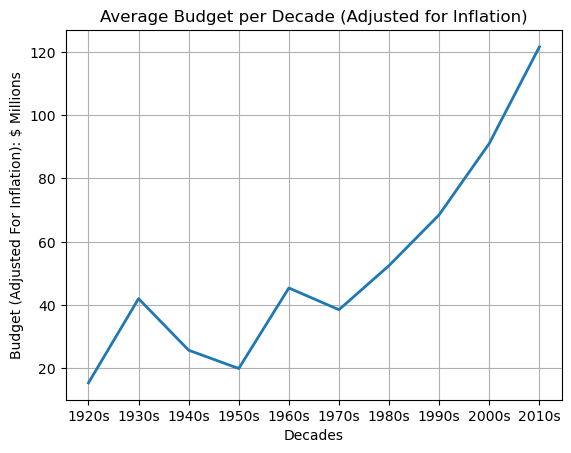

In [13]:

#Group Films by decade - boundary numbers included by default
twenties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1920, 1929))]
thirties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1930, 1939))]
fourties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1940, 1949))]
fifties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1950, 1959))]
sixties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1960, 1969))]
seventies = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1970, 1979))]
eighties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1980, 1989))]
nineties = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(1990, 1999))]
aughts = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(2000, 2009))]
tens = movie_data_with_revenue[(movie_data_with_revenue["Year"].between(2010, 2019))]


twenties_mean = twenties["Budget"].mean()
thirties_mean = thirties["Budget"].mean()
fourties_mean = fourties["Budget"].mean()
fifties_mean = fifties["Budget"].mean()
sixties_mean = sixties["Budget"].mean()
seventies_mean = seventies["Budget"].mean()
eighties_mean = eighties["Budget"].mean()
nineties_mean = nineties["Budget"].mean()
aughts_mean = aughts["Budget"].mean()
tens_mean = tens["Budget"].mean()

means_divided = []

decades = ["1920s", "1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

means = [twenties_mean, thirties_mean, fourties_mean, fifties_mean, sixties_mean, \
         seventies_mean, eighties_mean, nineties_mean, aughts_mean, tens_mean]

for mean in means:
    meandiv = mean / 1000000
    meanround = round(meandiv, 2)
    means_divided.append(meanround)

x_axis = np.arange(0, len(decades))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.plot(x_axis, means_divided, linewidth=2)
plt.xticks(tick_locations, decades)


plt.title("Average Budget per Decade (Adjusted for Inflation)")
plt.xlabel("Decades")
plt.ylabel("Budget (Adjusted For Inflation): $ Millions")
plt.grid()

# # Save the figure
plt.savefig("../output_data/ave_budget.png")

plt.show()


# Revenue vs. Budget for top 10 Films of the top 250

Examining the Budget vs. Revenue of just the top 10 films shows an interesting slice of films, from blockbusters, to classics to cult films. 

- 12 Angry Men is considered by some to be the greatest film of all time, though it's production budget and revenue are very low in comparison to the other highest rated films.

- "Fight Club" could be considered more of a "Cult Classic". It was did earn high revenue in relation to it's production cost but it is still among the top 10 films.

- "The Lord of the Rings" films were Blockbusters, earning huge revenue, far over production costs and also ranking among the top 10.

In [14]:
#Narrow down films to just the Top 10

top_10 = movie_data_with_revenue.query('index <= 10')
top_10

#Copy top_10 so it can be reformatted for $$ without throwing off sorting
top_10_copy = top_10.copy()
top_10_copy["Budget"] = top_10_copy["Budget"].map("${:,.0f}".format)
top_10_copy["Revenue"] = top_10_copy["Revenue"].map("${:,.0f}".format)

top_10_copy

,Title,Year,IMDB Rating,IMDB Votes,Budget,Revenue
Num,,,,,,
1,The Shawshank Redemption,1994,9.3,1825626,"$49,368,252","$28,341,469"
2,The Godfather,1972,9.2,1243444,"$42,007,894","$245,066,411"
3,The Godfather: Part II,1974,9.0,856870,"$77,170,689","$47,542,841"
4,The Dark Knight,2008,9.0,1802351,"$251,465,028","$1,004,558,444"
5,12 Angry Men,1957,8.9,494215,"$3,645,169","$1,000,000"
6,Schindler's List,1993,8.9,937837,"$44,556,470","$321,365,567"
7,The Lord of the Rings: The Return of the King,2003,8.9,1304569,"$149,508,532","$1,118,888,979"
8,Pulp Fiction,1994,8.9,1427451,"$15,797,840","$213,928,762"
9,Fight Club,1999,8.8,1458676,"$110,667,857","$100,853,753"


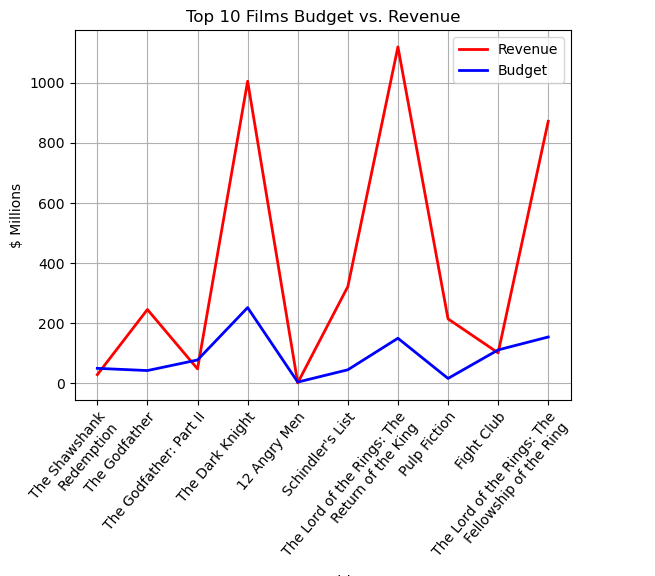

In [19]:
#Revenue and budget for top 10 rated
title= top_10["Title"]
rev= top_10["Revenue"].div(1000000).round(2)
budg= top_10["Budget"].div(1000000).round(2)

x_axis = np.arange(0, len(title))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

revenue_plot, = plt.plot(title, rev, color="red", label="Revenue", linewidth=2)
budget_plot, = plt.plot(title, budg, color="blue", label="Budget", linewidth=2)
plt.title("Top 10 Films Budget vs. Revenue")
plt.xlabel("Top 10 Titles")
plt.ylabel("$ Millions")
plt.xticks(tick_locations, title, rotation=50, ha="right", wrap=True)
 # Create a legend for the chart
plt.legend(handles=[revenue_plot, budget_plot], loc="best")
plt.grid()
plt.tight_layout
plt.autoscale

# # Save the figure
plt.savefig("../output_data/top10_budget_revenue.png", bbox_inches="tight")

plt.show()

# Estimated Profits Over Time

Subtracting Budget from Revenue gives a profit estimate for each film in the Top 250. The scatter plot shows increasing profits over time, including increasing instances of very high revenue films, including franchise films, like "Star Wars", "The Lord of the Rings" and "Harry Potter".

In [16]:
#getting estimated profit
movie_data_with_revenue["Estimated Profit"] = movie_data_with_revenue.loc[:, "Revenue"] - movie_data_with_revenue.loc[:, "Budget"]

profit_summary = movie_data_with_revenue.copy()
profit_summary = profit_summary[["Title", "Year", "Budget", "Revenue", "Estimated Profit"]]


profit_sort = profit_summary.sort_values(["Estimated Profit"], ascending=False)

profit_sort["Budget"] = profit_sort["Budget"].map("${:,.0f}".format)
profit_sort["Revenue"] = profit_sort["Revenue"].map("${:,.0f}".format)
profit_sort["Estimated Profit"] = profit_sort["Estimated Profit"].map("${:,.0f}".format)

# Export the merged dataset into a csv
profit_sort.to_csv("../output_data/profit_estimate.csv", index_label="Title")

profit_sort.head()


,Title,Year,Budget,Revenue,Estimated Profit
Num,,,,,
170,Star Wars: The Force Awakens,2015,"$302,511,950","$2,068,223,624","$1,765,711,674"
220,The Avengers,2012,"$280,425,882","$1,519,557,910","$1,239,132,028"
169,Harry Potter and the Deathly Hallows: Part 2,2011,"$162,630,201","$1,342,000,000","$1,179,369,799"
7,The Lord of the Rings: The Return of the King,2003,"$149,508,532","$1,118,888,979","$969,380,447"
197,Beauty and the Beast,1991,"$343,794,419","$1,262,886,337","$919,091,918"


The r-value is 0.47592944989623187


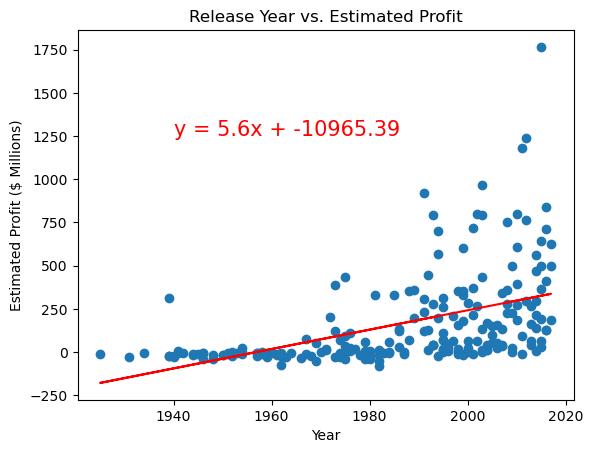

In [18]:
# Year vs IMDB votes
x_values = movie_data_with_revenue["Year"]
y_values = movie_data_with_revenue["Estimated Profit"].div(1000000).round(2)

x_annotate = 1940
y_annotate = 1250

# Linear Regression Plot
linear_regression(x_values, y_values, x_annotate, y_annotate)


# # Incorporate the other graph properties
plt.title("Release Year vs. Estimated Profit")
plt.xlabel("Year")
plt.ylabel("Estimated Profit ($ Millions)")

# # Save the figure
plt.savefig("../output_data/Year_Profit.png")

# Show plot
plt.show()